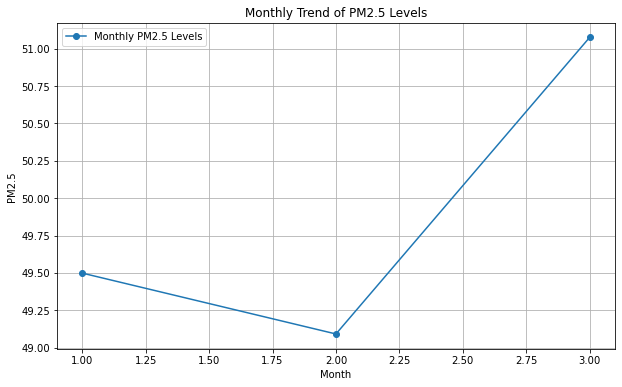

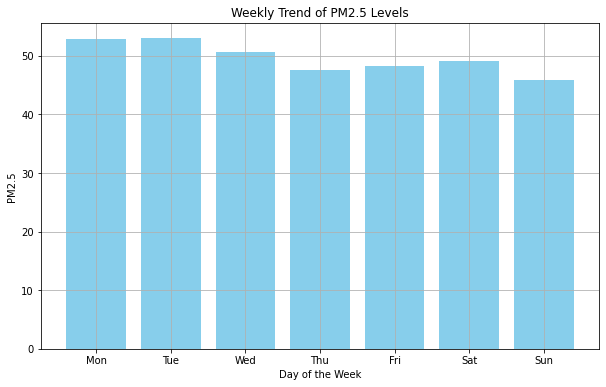

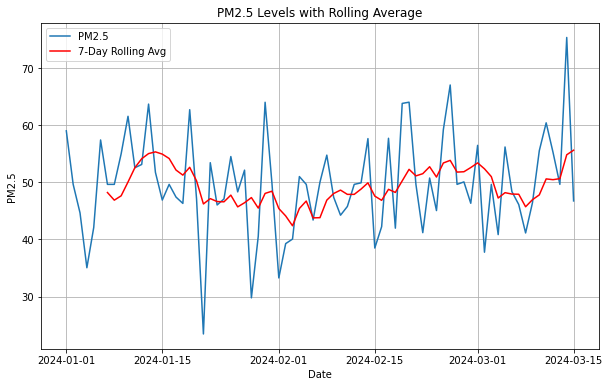

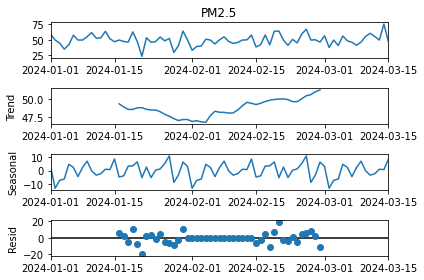

             Time  Location      PM2.5       PM10  Temperature  WindSpeed  \
Date                                                                        
2024-01-01  18:00     Rural  59.035325  76.911999    16.057517   4.289872   
2024-01-02  08:00     Rural  49.656461  58.399378    26.786523   3.212328   
2024-01-03  18:00  Suburban  44.655835  97.860909    22.927341   3.779430   
2024-01-04  18:00  Suburban  35.049461  99.490952    25.400994   4.330797   
2024-01-05  08:00     Rural  42.107417  66.992808    20.534399   6.161937   
2024-01-06  08:00  Suburban  57.437113  89.264613    23.325914   6.552860   
2024-01-07  18:00     Urban  49.656461  98.256062    32.801901   4.560482   
2024-01-08  12:00     Rural  49.656461  83.394324    25.642755   4.592085   
2024-01-09  18:00     Urban  55.014483  92.711021    27.747882   5.261623   
2024-01-10  18:00     Urban  61.581867  82.622495    18.645641   5.012147   

            Month  DayOfWeek  PM2.5_RollingAvg  
Date                      

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Generate a sample dataset
np.random.seed(42)

data = {
    "Date": np.arange("2024-01-01", "2024-03-16", dtype="datetime64[D]"),  # 75 dates
    "Time": np.random.choice(["08:00", "12:00", "18:00"], size=75),
    "Location": np.random.choice(["Urban", "Rural", "Suburban"], size=75),
    "PM2.5": np.random.normal(50, 10, size=75),
    "PM10": np.random.normal(80, 15, size=75),
    "Temperature": np.random.normal(25, 5, size=75),
    "WindSpeed": np.random.normal(5, 1, size=75),
}

# Simulate some missing values
data["PM2.5"][np.random.choice(75, 10, replace=False)] = np.nan

df = pd.DataFrame(data)

# 2. Handle Missing Values
# Fill missing PM2.5 values with the mean
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)

# 3. Convert Date column to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# 4. Create Time-Series Plots and Analyze Seasonality

# Extract temporal features
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Group by month and day of the week to analyze trends
monthly_trend = df.groupby('Month')['PM2.5'].mean()
weekly_trend = df.groupby('DayOfWeek')['PM2.5'].mean()

# Plot Monthly Trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend, marker='o', label='Monthly PM2.5 Levels')
plt.title('Monthly Trend of PM2.5 Levels')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.grid()
plt.legend()
plt.show()

# Plot Weekly Trend
plt.figure(figsize=(10, 6))
plt.bar(weekly_trend.index, weekly_trend.values, color='skyblue')
plt.title('Weekly Trend of PM2.5 Levels')
plt.xlabel('Day of the Week')
plt.ylabel('PM2.5')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid()
plt.show()

# 5. Time-Series Analysis: Rolling Averages
df.set_index('Date', inplace=True)  # Set Date as the index for time-series analysis
df['PM2.5_RollingAvg'] = df['PM2.5'].rolling(window=7).mean()

# Plot PM2.5 Levels and Rolling Average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['PM2.5'], label='PM2.5')
plt.plot(df.index, df['PM2.5_RollingAvg'], color='red', label='7-Day Rolling Avg')
plt.title('PM2.5 Levels with Rolling Average')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.grid()
plt.show()

# 6. Seasonal Decomposition
result = seasonal_decompose(df['PM2.5'], model='additive', period=30)
result.plot()
plt.show()

# Optional: Display Dataset (first 10 rows)
print(df.head(10))